# 🧩 4.4 – Colecciones de Objetos y Relaciones entre Clases

En este notebook aprenderás cómo los objetos pueden interactuar entre sí, formando estructuras complejas.
Trabajaremos los tres tipos principales de relaciones:

- **Asociación** → un objeto usa a otro.
- **Agregación** → un objeto contiene a otros, pero no los posee completamente.
- **Composición** → un objeto contiene a otros y controla su ciclo de vida.

---
## 🎯 Objetivos
- Gestionar colecciones de objetos dentro de clases.
- Comprender las diferencias entre **asociación**, **agregación** y **composición**.
- Implementar relaciones entre clases de manera estructurada.
- Crear métodos para manipular listas internas de objetos (añadir, eliminar, mostrar).

In [1]:
print('✅ Notebook 4.4 – Colecciones de Objetos y Relaciones cargado correctamente.')

✅ Notebook 4.4 – Colecciones de Objetos y Relaciones cargado correctamente.


---
## 1️⃣ Asociación: un objeto usa a otro

La **asociación** implica que un objeto conoce o usa a otro, pero ambos tienen vidas independientes.

### Ejemplo:

In [2]:
class Profesor:
    def __init__(self, nombre):
        self.nombre = nombre

    def explicar(self):
        return f'{self.nombre} está explicando.'

class Curso:
    def __init__(self, titulo, profesor):
        self.titulo = titulo
        self.profesor = profesor  # asociación

    def mostrar_info(self):
        return f'Curso: {self.titulo} — Profesor: {self.profesor.nombre}'

p = Profesor('Laura')
c = Curso('Python Avanzado', p) # la asociación ocurre aquí!
print(c.mostrar_info())
print(p.explicar())

Curso: Python Avanzado — Profesor: Laura
Laura está explicando.


**NOTA**:

La asociación viene cuando pasamos un objeto de la clase Profesor a la clase Curso, no cuando definimos la clase curso.

✅ El curso **usa** un objeto `Profesor`, pero no lo crea ni lo destruye.

---
## 2️⃣ Agregación: una clase contiene objetos, pero no controla su ciclo de vida

La **agregación** representa una relación “tiene un”, donde la clase contiene a otras instancias, pero no es responsable de crearlas o destruirlas.

### 🧩 Ejercicio 1 — Clase `Departamento` y `Empleado`
Crea:
- Clase `Empleado` con atributos `nombre` y `puesto`.
- Clase `Departamento` con lista `empleados` y métodos:
  - `añadir_empleado(e)`
  - `listar_empleados()`

💡 *Pista:* el `Departamento` solo **referencia** empleados externos, no los crea dentro de sí.

In [3]:
# Implementa aquí tu solución...

class Empleado:
    def __init__(self, nombre, puesto):
        self.nombre = nombre 
        self.puesto = puesto # las variables de otras clases no son accesibles directamente. nombre y puesto no se pueden
                            # acceder desde Departamento.

# Las variables de instancia (las que llevan "self" delante) son accesibles desde cualquier otro método de la clase

class Departamento:
    def __init__(self, empleados):
        self.empleados = [] # agregación. Departamento contiene a "Empleado", pero no es responsable de crearlos o destruirlos
                            # self.empleados es un atributo de instancia de Departamento.

    def anadir_empleado(self, e):
        self.empleados.append(e)
    
    def listar_empleados(self):
        print(f'Departamento {self.nombre}')
        for e in self.empleados:
            print(f'- {e.nombre} ({e.puesto})')

# NOTA: Todos los métodos de una clase (anadir_empleado, listar_empleados...) pueden acceder a self.empleados.


e1 = Empleado('Ana', 'Analista')
e2 = Empleado('Carlos', 'Desarrollador')
dep = Departamento('IT')
dep.anadir_empleado(e1)
dep.anadir_empleado(e2)

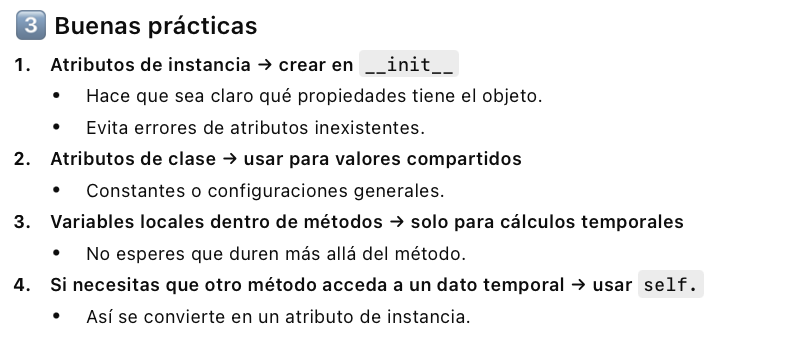

### ✅ Solución propuesta

In [4]:
class Empleado:
    def __init__(self, nombre, puesto):
        self.nombre = nombre
        self.puesto = puesto

class Departamento:
    def __init__(self, nombre):
        self.nombre = nombre
        self.empleados = []  # agregación

    def añadir_empleado(self, empleado):
        self.empleados.append(empleado)

    def listar_empleados(self):
        print(f'👔 Departamento {self.nombre}')
        for e in self.empleados:
            print(f'- {e.nombre} ({e.puesto})')

e1 = Empleado('Ana', 'Analista')
e2 = Empleado('Carlos', 'Desarrollador')
dep = Departamento('IT')
dep.añadir_empleado(e1)
dep.añadir_empleado(e2)
dep.listar_empleados()

👔 Departamento IT
- Ana (Analista)
- Carlos (Desarrollador)


✅ Los empleados **existen fuera** del `Departamento`, que solo mantiene una referencia a ellos.

---
## 3️⃣ Composición: una clase crea y controla los objetos que contiene

En la **composición**, los objetos contenidos se crean dentro del constructor de la clase principal y dependen totalmente de ella. Si se destruye el objeto "padre", los "hijos" también se destruyen. La diferencia con la agregación es esa, que los objetos "hijos", en agregación, pueden existir independientemente.

### 🧩 Ejercicio 2 — Clase `Pedido` y `LineaPedido`
Crea:
- Clase `LineaPedido` con atributos `producto`, `cantidad`, `precio`.
- Clase `Pedido` que:
  - Contenga una lista de `lineas`.
  - Cree las líneas internamente con `añadir_linea(producto, cantidad, precio)`.
  - Calcule el total con `total()`.

💡 *Pista:* aquí `Pedido` **posee** las líneas: si se borra el pedido, desaparecen las líneas.

En este caso:
- Pedido -> clase padre
- LineaPedido -> clase hija
- Pedido crea y contiene internamente las líneas

In [5]:
# Implementa aquí tu código...

class LineaPedido:
    '''
    Es una clase simple que solo almacena datos de cada línea.
    '''
    def __init__(self, producto, cantidad, precio): # estos argumentos de instancia pasan a pertenecer directamente
        # al objeto LineaPedido una vez está creado. Se pueden llamar en cualquier método usando .self.
        self.producto = producto
        self.cantidad = cantidad
        self.precio = precio
    
    def subtotal(self):
        '''
        Cada línea calcula su propio coste
        '''
        return self.cantidad * self.precio


class Pedido:
    def __init__(self, lineas):
        self.lineas = []

    def anadir_linea(self, producto, cantidad, precio):
        '''
        Creación de objeto LineaPedido internamente
        '''
        linea = LineaPedido(producto, cantidad, precio)
        self.lineas.append(linea)

    def total(self):
        return sum(linea.subtotal() for linea in self.lineas)

### ✅ Solución propuesta

In [6]:
class LineaPedido:
    def __init__(self, producto, cantidad, precio):
        self.producto = producto
        self.cantidad = cantidad
        self.precio = precio

    def subtotal(self):
        return self.cantidad * self.precio

class Pedido:
    def __init__(self, cliente):
        self.cliente = cliente
        self.lineas = []  # composición

    def añadir_linea(self, producto, cantidad, precio):
        self.lineas.append(LineaPedido(producto, cantidad, precio))

    def total(self):
        return sum(l.subtotal() for l in self.lineas)

pedido = Pedido('David')
pedido.añadir_linea('Teclado', 2, 30)
pedido.añadir_linea('Ratón', 1, 20)
print('Total pedido:', pedido.total(), '€')

Total pedido: 80 €


✅ En la **composición**, las instancias internas (`LineaPedido`) solo existen dentro del objeto `Pedido`.

---
## 4️⃣ Colecciones y métodos de búsqueda

Cuando una clase gestiona colecciones, es buena práctica ofrecer **métodos de consulta y filtrado**.

### 🧩 Ejercicio 3 — Buscar objetos en una colección
Amplía la clase `Pedido` para añadir un método `buscar_producto(nombre)` que devuelva las líneas que coincidan con el nombre del producto.

💡 *Pista:* usa comprensión de listas `[l for l in self.lineas if ...]`.

In [8]:
# Escribe tu implementación aquí...

### ✅ Solución propuesta

In [9]:
def buscar_producto(self, nombre):
    return [l for l in self.lineas if nombre.lower() in l.producto.lower()]

Pedido.buscar_producto = buscar_producto

for linea in pedido.buscar_producto('teclado'):
    print('Encontrado:', linea.producto, linea.subtotal(), '€')

Encontrado: Teclado 60 €


---
## 🧠 Resumen del notebook

- **Asociación:** los objetos colaboran pero son independientes.
- **Agregación:** un objeto contiene referencias a otros, sin poseerlos.
- **Composición:** un objeto crea y controla los objetos que contiene.
- Las colecciones internas permiten organizar relaciones complejas.
- Las buenas prácticas incluyen añadir métodos para consultar o filtrar datos.

💡 Próximo paso → **4.5 – Laboratorio: Sistema de Facturación Orientado a Objetos.**